   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

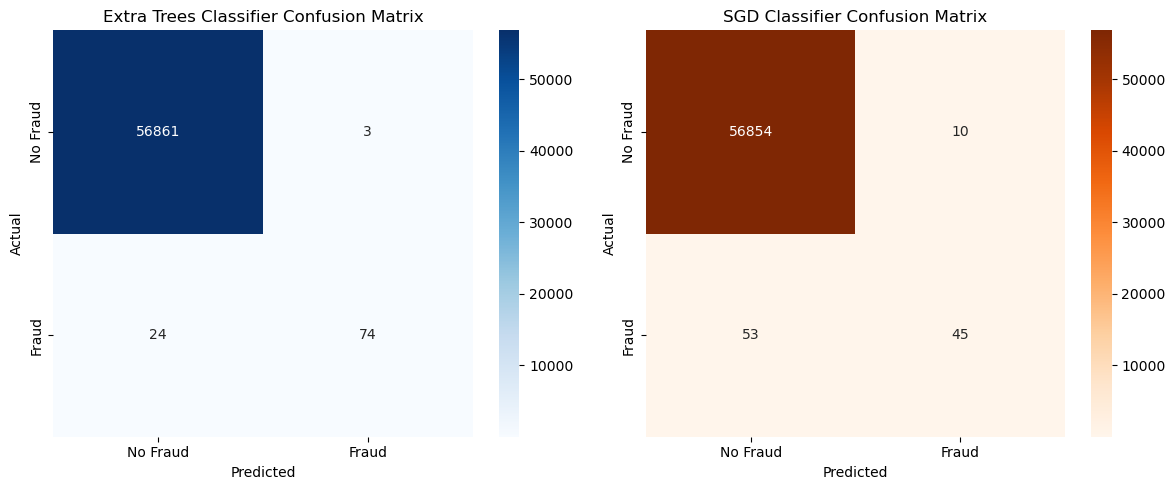

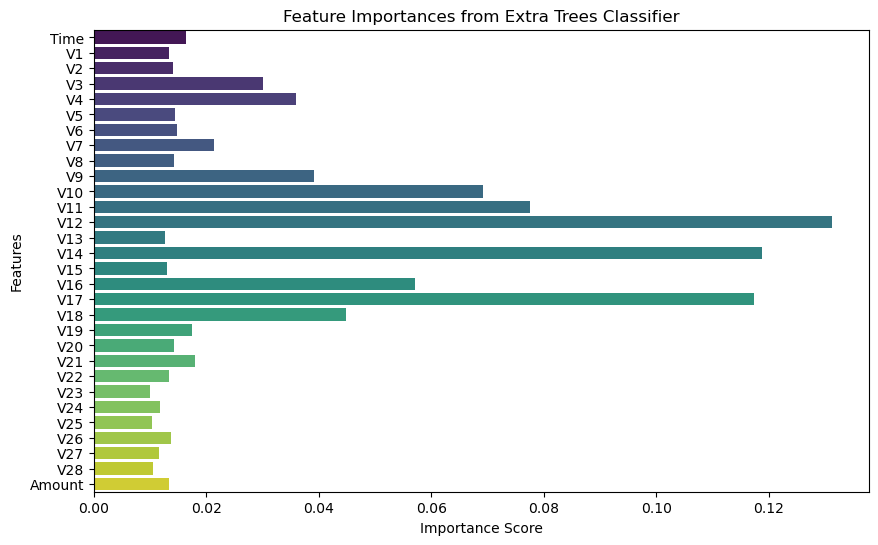

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('creditcard.csv')

print(data.head())  
print(data.info())  
print(data['Class'].value_counts())  

features = data.drop(columns=['Class'])  
target = data['Class']  

scaler = RobustScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

tree_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
tree_model.fit(X_train, y_train)

predictions_tree = tree_model.predict(X_test)

print("Extra Trees Classifier Results:")
print(confusion_matrix(y_test, predictions_tree))  
print(classification_report(y_test, predictions_tree))  

sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

predictions_sgd = sgd_model.predict(X_test)

print("SGD Classifier Results:")
print(confusion_matrix(y_test, predictions_sgd))  
print(classification_report(y_test, predictions_sgd))  

conf_matrix_tree = confusion_matrix(y_test, predictions_tree)
conf_matrix_sgd = confusion_matrix(y_test, predictions_sgd)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Extra Trees Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_sgd, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('SGD Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

feature_importances = tree_model.feature_importances_
features_list = features.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features_list, palette='viridis')
plt.title('Feature Importances from Extra Trees Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
